# Bitácora de Laboratorio: Torque Magnético
**Curso:** Laboratorio Intermedio de Física  
**Fecha:** 2025-09-03  
**Integrantes:** Ángela Bustos y  Mariana Montoya. 

---
## Objetivos
- Medir el momento magnético usando métodos estáticos y dinámicos.
- Observar precesión y resonancia magnética.
- Comparar resultados con el modelo teórico.

---
## Marco Teórico (resumen mínimo)
Torque sobre dipolo: $\vec{\tau}=\vec{\mu}\times\vec{B}$.  
Fuerza en campo no uniforme: $\vec{F}=(\vec{\mu}\cdot\nabla)\vec{B}$.  
Pequeñas oscilaciones: $T^2=\dfrac{4\pi^2 I}{\mu B}$.  
Precesión: $\Omega=\dfrac{\mu B}{L_s}$.

---
## Montaje (breve)
Arreglo de bobinas, unidad de control, estroboscopio, bola de resina con imán.


<p align="center">
  <img src="montaje.jpg" alt="Mi imagen" width="600">
</p>

---
## Datos iniciales 

In [44]:
"""m_bolita = 141.3 #g
m_pesa = 1.5 #g
d_varilla = 9.71 #cm
r_bolita = 4.81/2 #cm
l_manija= 0.82 #cm
g = 9.80665

err_pie_rey = 0.05*10e-3 #mm
err_unidad = 0.5 #Amperes
err_tiempo= 0.01 #segundos
err_pesa = 0.1 #g"""

m_bolita = 141.3 * 1e-3          # kg  -> 0.1413
m_pesa   = 1.5   * 1e-3          # kg  -> 0.0015
d_varilla = 9.71 * 1e-2          # m   -> 0.0971
r_bolita  = (4.81/2) * 1e-2      # m   -> 0.02405
l_manija  = 0.82 * 1e-2          # m   -> 0.0082
g = 9.80665                      # m/s^2 (ya SI)

# Incertidumbres en SI
err_pie_rey = 0.05 * 1e-3        # m   (0.05 mm = 5e-5 m)
err_unidad  = 0.5                # A
err_tiempo  = 0.01               # s
err_pesa    = 0.1 * 1e-3         # kg  (0.1 g = 1e-4 kg)


In [32]:
import numpy as np
import matplotlib.pyplot as plt


---
## Actividad 1: Equilibrio estático
Relación esperada: $\mu B = rmg + dMg$.  
Ingresar mediciones (m, r, B) para varias posiciones o distintos r. Calcular $rmg$ y graficar vs. $B$.

In [47]:
l_peso = np.array([5.04, 5.77, 1.33, 2.35, 0, 2.62, 3.7])*10e-3+l_manija +r_bolita  # m
I_palo = np.array([3.1, 3.3, 2.3, 2.5, 2.1, 2.6, 2.8])  # A

k_BI = 1.36e-3   # T/A
B = k_BI * I_palo
x = B

y = l_peso * m_pesa * g
err_y = np.sqrt((m_pesa*g*err_pie_rey)**2 + (l_peso*g*err_pesa)**2)
err_B = k_BI * err_unidad


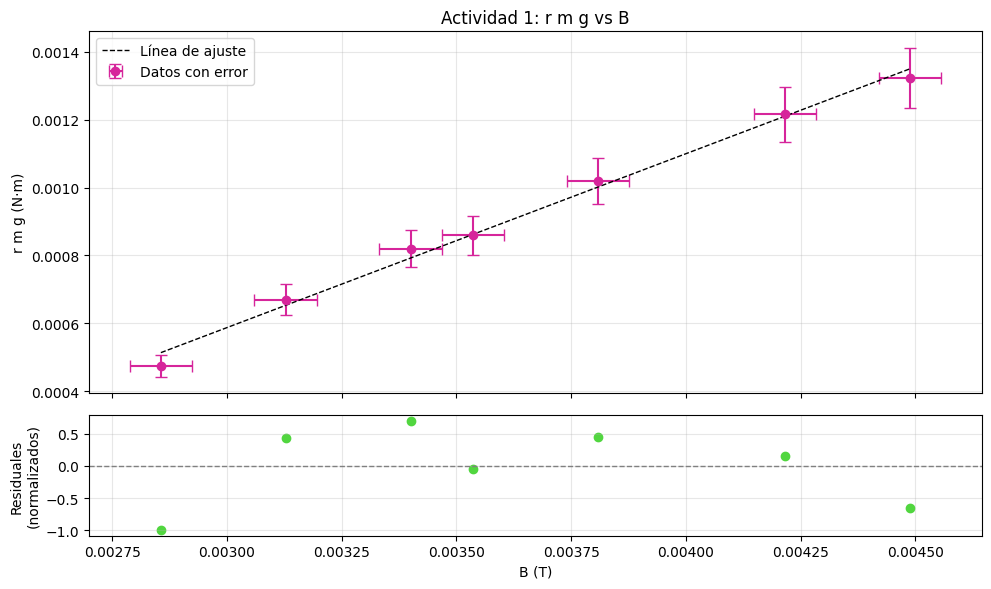

In [48]:
# --- AJUSTE LINEAL + COVARIANZA ---
coef, cov = np.polyfit(x, y, 1, cov=True)
mfit, bfit = coef
smfit, sbfit = np.sqrt(np.diag(cov))

x_ajuste = np.linspace(x.min(), x.max(), 200)
y_ajuste = mfit * x_ajuste + bfit

# --- RESIDUALES ---
residuales = y - (mfit * x + bfit)


max_abs_res = np.max(np.abs(residuales))
if max_abs_res == 0:
    residuales_norm = np.zeros_like(residuales)
    err_res_norm = np.zeros_like(err_y)
else:
    residuales_norm = residuales / max_abs_res
    err_res_norm = err_y / max_abs_res

# --- PLOTS ---
color_n1 = "#D6259B"
color_n2 = "#51D63F"

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(10, 6), sharex=True,
    gridspec_kw={"height_ratios": [3, 1]}
)


ax1.set_title("Actividad 1: r m g vs B")
ax1.set_ylabel("r m g (N·m)")
ax1.grid(True, alpha=0.3)

ax1.errorbar(x, y, xerr=err_B*10e-2, yerr=err_y,
             fmt="o", capsize=4, color=color_n1, label="Datos con error")
ax1.plot(x_ajuste, y_ajuste, "--", linewidth=1, color="black", label="Línea de ajuste")
ax1.legend()

ax2.set_xlabel("B (T)")
ax2.set_ylabel("Residuales\n(normalizados)")
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.scatter(x, residuales_norm, color=color_n2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [49]:
print(f"Pendiente = {mfit:.3e} ± {smfit:.3e}")
print(f"Intercepto = {bfit:.3e} ± {sbfit:.3e}")


Pendiente = 5.119e-01 ± 1.896e-02
Intercepto = -9.480e-04 ± 6.965e-05


---
### Conclusiones preliminares 

Se realizó un análisis del equilibrio de torques en el sistema, considerando la fuerza magnética y el torque gravitacional. La relación teórica utilizada fue:

$$
\muB=rmg+dMg
$$

Se graficó  utilizando  B y rmg . En un primer momento, para B se utilizó k_B (T/A),dado por la guía y que se entiende que es obtenido de forma experimental, e I (A), medido de forma experimental para diferentes puntos de equilibrio, para obtener la ecuación del campo magnético de la forma: 

$$
B =  k_B * I 
$$

Luego se pudo ver un error asociado de la forma : 

$$
\Delta B = k_B *  \Delta I
$$

luego para tener el valor  de rmg, se multiplicó por la gravedad terrestre a la masa peso ,generador de torque, y a la longitud de la varilla desde la manija negra más el radio de la esfera y la manija negra. Considerando un error asociado de la forma: 
$$

\sigma_d =
\sqrt{
\left(\frac{\partial d}{\partial b}\sigma_b\right)^2 +
\left(\frac{\partial d}{\partial M}\sigma_M\right)^2 
}

$$


Luego del ajuste, se pudo ver un comportamiento lineal esperado debido a que estos están relacionados por el equilibrio dado por la ecuación 4 de la guía y descrito al inicio de esta actividad. 

Como resultado, se obtuvo un momento magnético con un valor de 5.11x10^-1+- 1.89 x10^-02  y el intercepto de -9.48x10 ^-4 +- 6.96e^-5 valores cercanos al valor esperado. 




---
## Actividad 2: Oscilación armónica
Relación esperada: $T^2 = \dfrac{4\pi^2 I}{\mu B}$.  
Ingresar mediciones (I, T, B) siendo I variado por uno mismo. Graficar $T^2$ vs $1/B$ y ajustar línea: pendiente $=\dfrac{4\pi^2 I}{\mu}$.


In [103]:
I = np.array([1,1.2,1.3,1.4,1.15,1.25,1.35,1.45,1.5]) #Amperes
t = np.array([30.64,28.69,28.49,27.28,30.24,29.10,28.02,27.28,26.9]) #segundos, cuanto demora en dar 20  oscilaciones
t_sola = t//20 #segundos, cuanto demora en dar una oscilación

k_BI = 1.36e-3   # T/A
B = k_BI * I
x = 1/B
err_B = k_BI * err_unidad

y = t**2
err_y = 2* t * err_tiempo

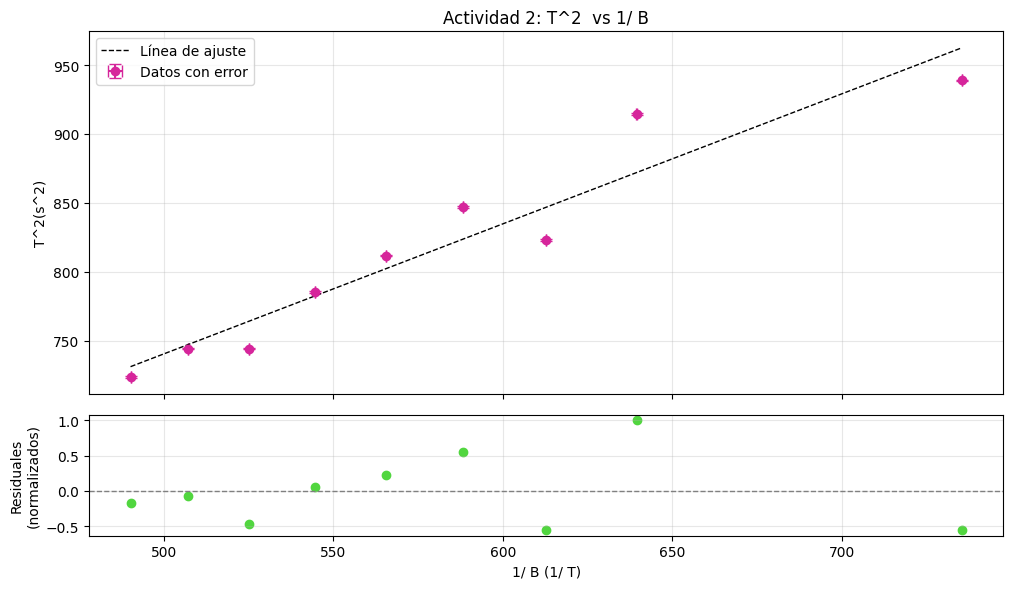

In [101]:
# --- AJUSTE LINEAL + COVARIANZA ---
coef, cov = np.polyfit(x, y, 1, cov=True)
mfit, bfit = coef
smfit, sbfit = np.sqrt(np.diag(cov))

x_ajuste = np.linspace(x.min(), x.max(), 200)
y_ajuste = mfit * x_ajuste + bfit

# --- RESIDUALES ---
residuales = y - (mfit * x + bfit)

max_abs_res = np.max(np.abs(residuales))
if max_abs_res == 0:
    residuales_norm = np.zeros_like(residuales)
    err_res_norm = np.zeros_like(err_y)
else:
    residuales_norm = residuales / max_abs_res
    err_res_norm = err_y / max_abs_res

# --- PLOTS ---
color_n1 = "#D6259B"
color_n2 = "#51D63F"

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(10, 6), sharex=True,
    gridspec_kw={"height_ratios": [3, 1]}
)


ax1.set_title("Actividad 2: T^2  vs 1/ B")
ax1.set_ylabel("T^2(s^2)")
ax1.grid(True, alpha=0.3)  

ax1.errorbar(x, y, xerr=err_B, yerr=err_y,
             fmt="o", capsize=4, color=color_n1, label="Datos con error")
ax1.plot(x_ajuste, y_ajuste, "--", linewidth=1, color="black", label="Línea de ajuste")
ax1.legend()

ax2.set_xlabel("1/ B (1/ T)")
ax2.set_ylabel("Residuales\n(normalizados)")
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.scatter(x, residuales_norm, color=color_n2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [102]:
print(f"Pendiente = {mfit:.3e} ± {smfit:.3e}")
print(f"Intercepto = {bfit:.3e} ± {sbfit:.3e}")

Pendiente = 9.443e-01 ± 1.110e-01
Intercepto = 2.682e+02 ± 6.475e+01


---
### Conclusiones preliminares 

Se graficó T^2 vs 1/B y logramos encontrar un valor de 9.44e-01 +- 1.1e-01 .

---
## Actividad 3: Precesión
Relación esperada: $\Omega = \dfrac{\mu B}{L_s}$.  
Graficar $\Omega$ vs $B$; pendiente $=\mu/L_s$.


In [109]:
f = 3.8 #Hz frecuencia dada por el electrodoscopio
I = np.array([1,1.5,2,2.5,3,3.5,4]) # Amperes
T = np.array([10.27, 7.63,4.81, 3.55, 2.51, 1.91, 1.72 ]) # segundos 

k_BI = 1.36e-3   # T/A
B = k_BI * I
x = B
err_B = k_BI * err_unidad

Omega = 2*np.pi / T  # rad/s
y = Omega
err_y = (2*np.pi / (T**2)) * err_tiempo

I_bola = (2/5) * m_bolita * r_bolita**2

Ls = I_bola * 2*np.pi * f
sigma_Ls = (4/5)*m_bolita*2*np.pi * f*r_bolita * err_pie_rey/2

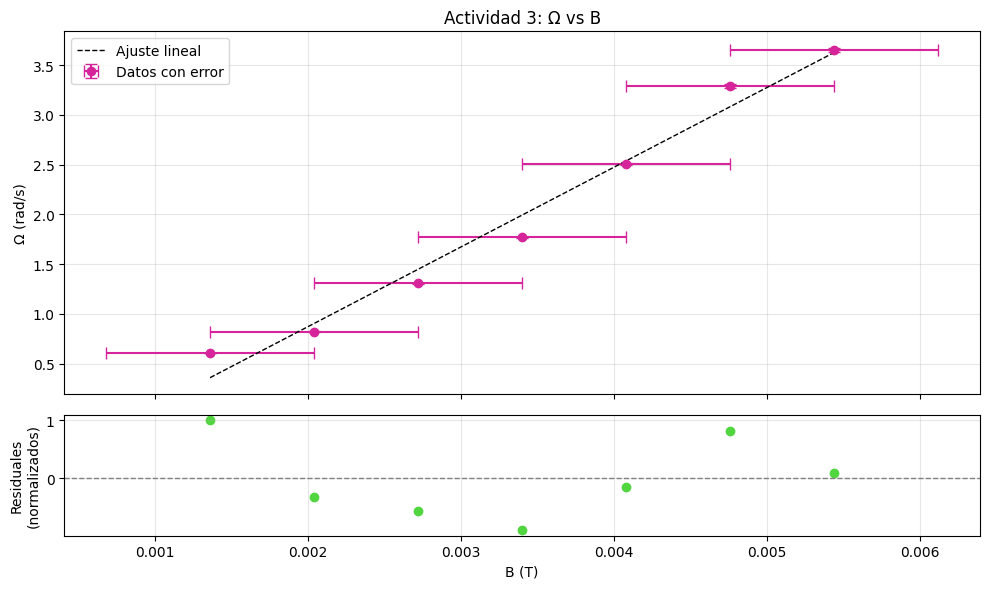

In [114]:
coef, cov = np.polyfit(x, y, 1, cov=True)
mfit, bfit = coef
smfit, sbfit = np.sqrt(np.diag(cov))

x_ajuste = np.linspace(x.min(), x.max(), 200)
y_ajuste = mfit * x_ajuste + bfit
C00, C01, C11 = cov[0,0], cov[0,1], cov[1,1]
sigma_yhat = np.sqrt(C00*x_ajuste**2 + 2*C01*x_ajuste + C11)

# Residuales normalizados
residuales = y - (mfit*x + bfit)
max_abs_res = np.max(np.abs(residuales))
residuales_norm = residuales/max_abs_res if max_abs_res != 0 else np.zeros_like(residuales)

# Plot
color_n1 = "#D6259B"; color_n2 = "#51D63F"
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6), sharex=True,
                               gridspec_kw={"height_ratios":[3,1]})

ax1.set_title("Actividad 3: Ω vs B")
ax1.set_ylabel("Ω (rad/s)")
ax1.grid(True, alpha=0.3)
ax1.errorbar(x, y, xerr=err_B, yerr=err_y, fmt="o", capsize=4,
             color=color_n1, label="Datos con error")
ax1.plot(x_ajuste, y_ajuste, "--", linewidth=1, color="black", label="Ajuste lineal")
ax1.legend()

ax2.set_xlabel("B (T)")
ax2.set_ylabel("Residuales\n(normalizados)")
ax2.axhline(0, color="gray", linestyle="--", linewidth=1)
ax2.scatter(x, residuales_norm, color=color_n2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [115]:
print(f"Pendiente m = {mfit:.3e} ± {smfit:.1e}  (rad·s⁻¹·T⁻¹)")
print(f"Intercepto b = {bfit:.3e} ± {sbfit:.1e}  (rad·s⁻¹)")


Pendiente m = 8.011e+02 ± 5.3e+01  (rad·s⁻¹·T⁻¹)
Intercepto b = -7.298e-01 ± 2.0e-01  (rad·s⁻¹)


---
## Comparación de resultados
Completa con los valores estimados de $\mu$ de cada actividad y discute la compatibilidad.

- Fuentes de error: campo terrestre, fricción, no uniformidad de $B$, lectura del estroboscopio.

- Sugerencias de mitigación: nivelación, repetir medidas, promediar, controlar corrientes externas.
